In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read data

In [53]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


### Inspect Data

In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
print('Train data shape: ',train.shape)
print('Test data shape: ',test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [56]:
#remove the unnecessary id column it does not play any significance role in determing the target variable
train.drop('Id',axis=1,inplace=True)

Separate numerical and categorical features

In [57]:
num_features = train.select_dtypes(include='number')
num_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are 37 numerical features including the target variable i.e.'SalePrice' 

In [58]:
cat_features = train.select_dtypes(include='object')
cat_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


There are 43 categorical features

#### Check for nulls

In [59]:
#number of null values in numerical features
num_features.isna().sum()[num_features.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [60]:
#number of null values in categorical features
cat_features.isna().sum()[cat_features.isna().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Discard the features those have more than 80% null values since:

1. Imputing the nulls with most frequent value or even 'missing' will lead to decrease in variability of data and not leading to accurate results.

2. We have 80 features corresponding to 1460 features, it is necessary to discard the less prominent features to avoid curse of dimensionality. 

In [61]:
#Create mask to obtain features with more than 80% null values
null_mask = cat_features.isna().sum()/len(train) > 0.80

features_to_remove = cat_features.columns[null_mask]
features_to_remove

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [62]:
train.drop(columns=features_to_remove,inplace=True)
cat_features.drop(columns=features_to_remove,inplace=True)

### Numerical Features

In [63]:
num_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

* MSSubClass: Ordinal in nature and identifies the type of dwelling involved in the sale.
* LotFrontage, LotArea : Continuous Variables
* OverallQual, OverallCond : Ordinal Variables
* YearBuilt: Original construction date,Continuous Variable 
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions), Continuous Variable
* MasVnrArea: Continuous Variable
* BsmtFinSF1, BsmtFinSF2 : Continuous in nature (tally with BsmtFinType1, BsmtFinType2 respectively)
* BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: Continuous variable
* BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr: Ordinal Features
* TotRmsAbvGrd,Fireplaces: Ordinal Features
* GarageYrBlt: Continuous Variable
* GarageCars: Ordinal Variable
* GarageArea: Continuous Variable
* WoodDeckSF, OpenPorchSF,EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea: Continuous Variable
* MiscVal : Continuous Variable
* MoSold, YrSold: Nominal Variable
* SalePrice : Continuous Features

* LotFrontage, MasVnrArea, GarageYrBlt: These variables contain null values

#### Dealing with Nulls in Numerical Features

Dealing with nulls in LotFrontage variable

In [64]:
#Impute Null Values
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)

Dealing with nulls in MasVnrArea variable

In [65]:
train.loc[train['MasVnrArea'].isna(), 'MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

MasVnrArea is null where MasVnrType is not present. Therefore we can impute null values in MasVnrArea by 0

In [66]:
train['MasVnrArea'].fillna(0, inplace=True)

Dealing with nulls in GarageYrBlt variable

In [67]:
train.loc[train['GarageType'].isna(), 'GarageYrBlt']

39     NaN
48     NaN
78     NaN
88     NaN
89     NaN
        ..
1349   NaN
1407   NaN
1449   NaN
1450   NaN
1453   NaN
Name: GarageYrBlt, Length: 81, dtype: float64

GarageYrBlt is null where GarageType is not present. Therefore we can impute null values in GarageYrBlt by 0

In [68]:
train['GarageYrBlt'].fillna(0, inplace=True)

Is There Any null Left among numerical features ??

In [69]:
train[num_features.columns].isna().sum().sum()

0

#### Dealing with outliers

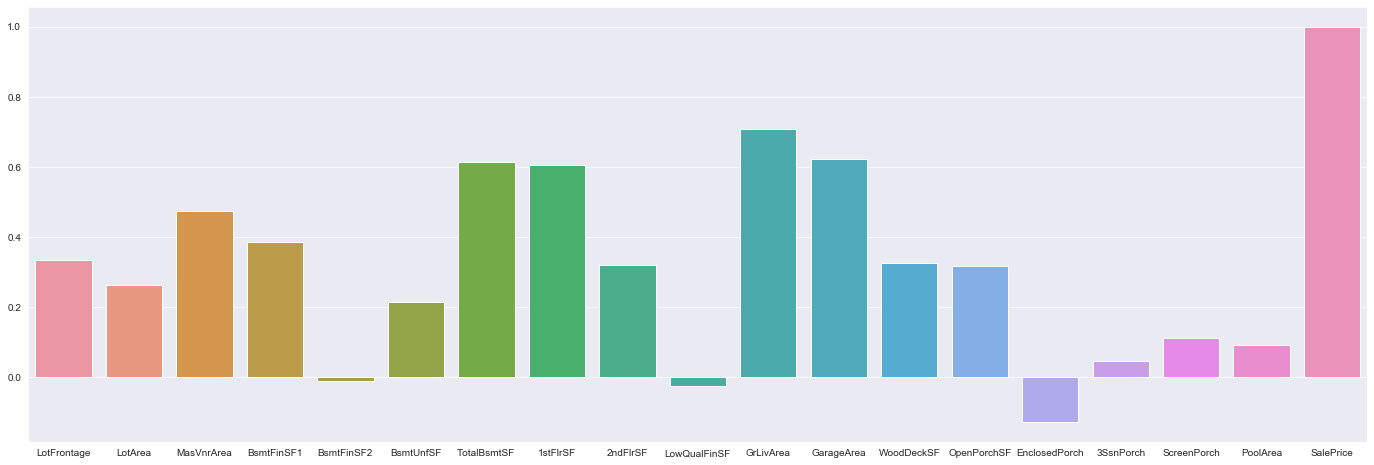

In [70]:
area_num_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
               'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
                '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice']

plt.figure(figsize=(24,8))
sns.set_style('darkgrid')
corr_index = train[area_num_var].corr()['SalePrice'].index
corr_value = train[area_num_var].corr()['SalePrice'].values
sns.barplot(corr_index,corr_value)

We will be inspecting the variables with high correlation for the presence of outliers and deal with them based on their distribution w.r.t. the target variable

In [71]:
def scatter_box_plot(feature):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    sns.scatterplot(feature,'SalePrice',data=train,ax=ax1)
    sns.boxplot(feature,data=train,ax=ax2)

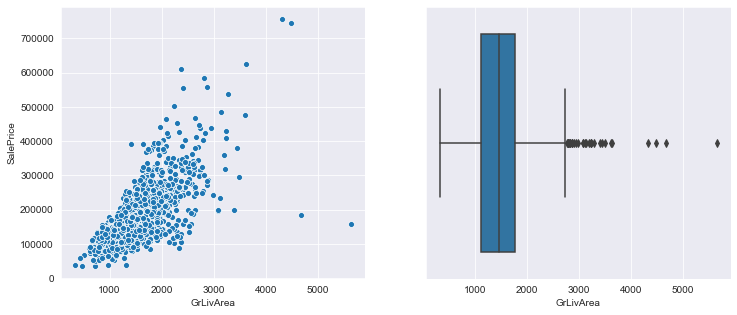

In [72]:
scatter_box_plot('GrLivArea')

In [73]:
train.loc[train['GrLivArea']>4500,'GrLivArea'] = 4500

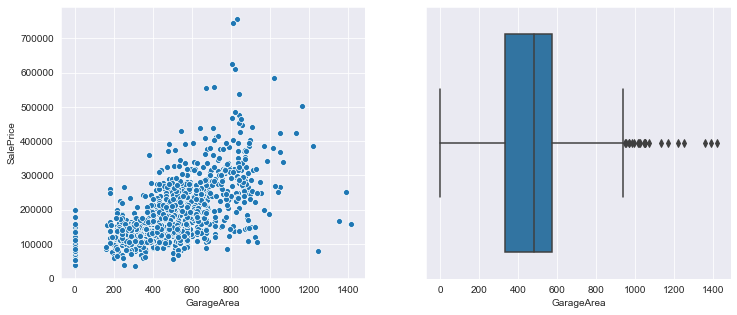

In [74]:
scatter_box_plot('GarageArea')

In [75]:
train.loc[train['GarageArea']>1200,'GarageArea'] = 1200

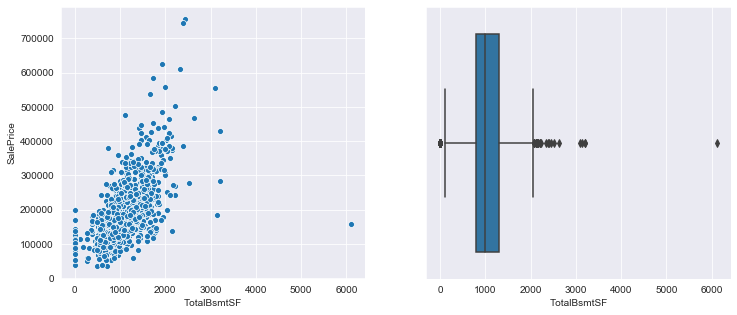

In [76]:
scatter_box_plot('TotalBsmtSF')

In [77]:
train.loc[train['TotalBsmtSF']>3000,'TotalBsmtSF']=2500

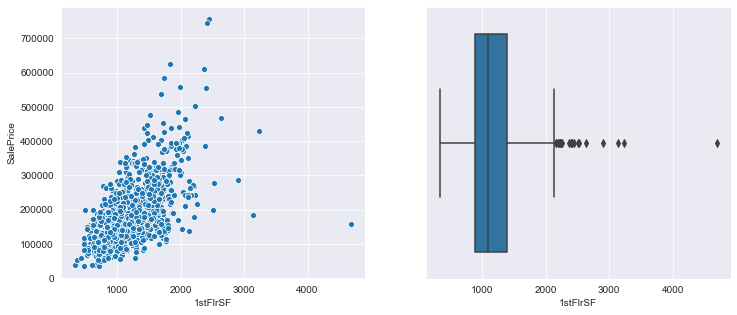

In [78]:
scatter_box_plot('1stFlrSF')

In [79]:
train.loc[train['1stFlrSF']>3000,'1stFlrSF'] = 2500

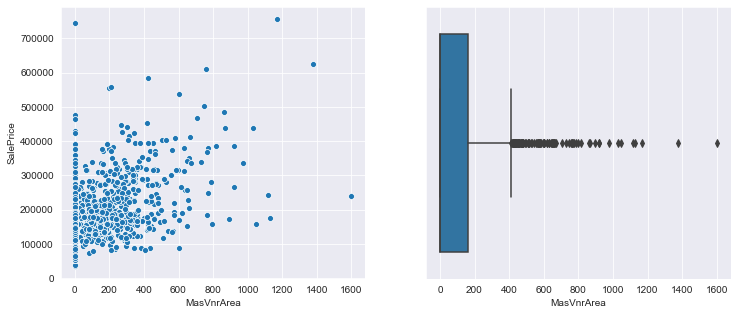

In [80]:
scatter_box_plot('MasVnrArea')

In [81]:
train.loc[train['MasVnrArea']>1000,'MasVnrArea']=900

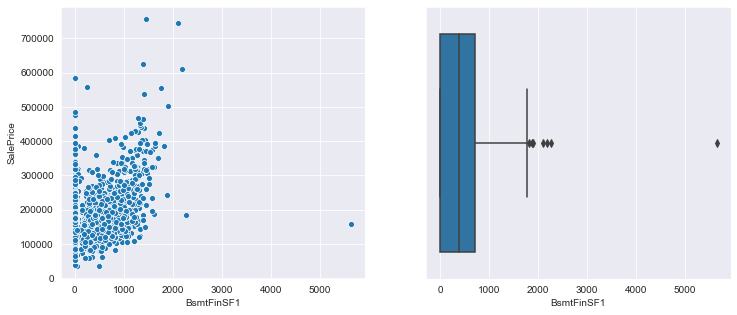

In [82]:
scatter_box_plot('BsmtFinSF1')

In [83]:
train.loc[train['BsmtFinSF1']>2000,'BsmtFinSF1'] = 1700

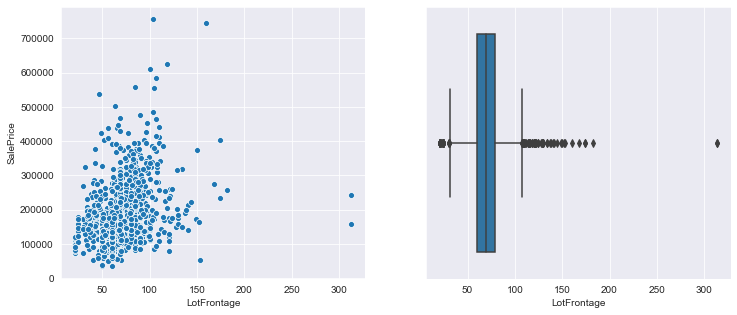

In [84]:
scatter_box_plot('LotFrontage')

In [85]:
train.loc[train['LotFrontage']>250,'LotFrontage'] = 175

We could have dealt with the outliers present in other features too but since they produce a little effect on the target variable, therefore we decided to leave them as it is.

### Categorical Variables

In [86]:
print('Number of categorical variables are: ', len(cat_features.columns))

Number of categorical variables are:  39


#### Dealing with Nulls

In [87]:
cat_features.isna().sum()[cat_features.isna().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

The null values in all the categorical features except 'Electrical' are present because there is absence of that particular feature for that observation. While for 'Electrical' feature it is missing at random.

In [88]:
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)
train.fillna('NO',inplace=True)

train.isna().sum().sum()

0

#### Encoding Features

In [89]:
# encoding ordinal features
encode1 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NO':0}
encode2= {'Gd':4,'Av':3,'Mn':2,'No':1,'NO':0}
encode3 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NO':0}

cat1 = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
      'KitchenQual','FireplaceQu','GarageQual','GarageCond']

cat2 = ['BsmtExposure']

cat3 = ['BsmtFinType1','BsmtFinType2']


for col in cat1:
    train[col] = train[col].map(encode1)
    
for col in cat2:
    train[col] = train[col].map(encode2)
    
for col in cat3:
    train[col] = train[col].map(encode3)

In [90]:
nominal_features = train.select_dtypes(include='object').columns

In [91]:
dummy_features = pd.get_dummies(train[nominal_features],drop_first=True)

In [92]:
train.drop(nominal_features,axis=1,inplace=True)

In [93]:
train = pd.concat([train,dummy_features],axis=1)

Our final train data has shape

In [94]:
train.shape

(1460, 207)

### Feature Selection and Modelling

We will be selecting important features through a model based approach by accesing the feature_importances_ attribute of RandomForestRegressor.

In [95]:
from sklearn.ensemble import RandomForestRegressor
X=train.drop('SalePrice',axis=1)
y= train['SalePrice']
rf = RandomForestRegressor(max_depth=5,n_estimators=500)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
importance_df = pd.DataFrame(rf.feature_importances_)
importance_df.index = X.columns
importance_df.columns = ['Importance']
importance_df = importance_df.loc[importance_df['Importance'] != 0,:]
len(importance_df)

147

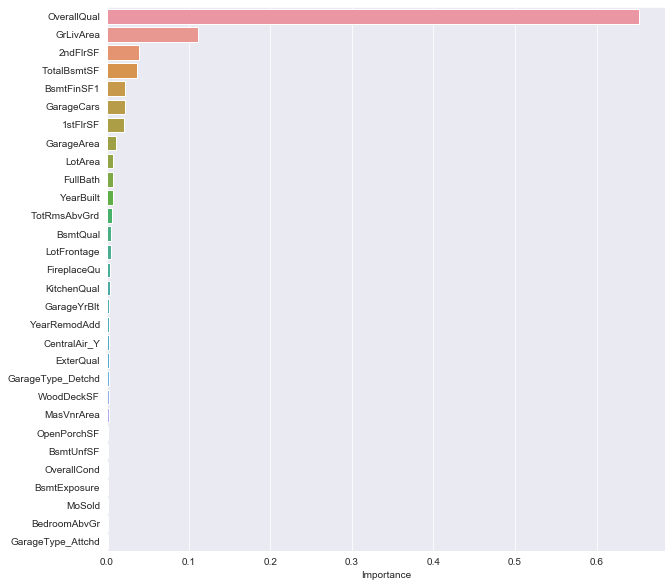

In [97]:
#Selecting top 30 features
importance_df = importance_df.sort_values(by='Importance',ascending=False)[:30]

plt.figure(figsize=(10,10))
sns.barplot(y=importance_df.index,x = importance_df.Importance)

In [98]:
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X,y = X[importance_df.index], y
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.15,random_state=1)

param_dict = dict(eta=[0.05,0.01],max_depth=[4,5,6],n_estimators=[1600,1700,1800,1900,2000])
xgb = XGBRegressor(objective='reg:squarederror')
clf = GridSearchCV(xgb,param_grid=param_dict)
clf.fit(X_train,y_train)
train_pred = clf.predict(X_train)
display(mse(np.log(y_train),np.log(train_pred))**0.5)

test_pred = clf.predict(X_val)
display(mse(np.log(y_val),np.log(test_pred))**0.5)

0.01920187435598956

0.1227713771805437

In [99]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)